Import modules

In [1]:
!pip install -U CADE
!pip install git+https://github.com/valedica/gensim.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 8.5 MB/s 
     |████████████████████████████████| 132 kB 35.8 MB/s 
     |████████████████████████████████| 9.0 MB 51.3 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 139 kB 81.0 MB/s 
     |████████████████████████████████| 127 kB 53.5 MB/s 
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90641 sha256=d60be2f4afd57a76e63d2fac03e0e23d685479ddeab905f6516242f3af1c4484
  Stored in directory: /root/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
Successfully built smart-open
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.2.1
    Uninstalling 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/DataSemantics/progetto/')

In [4]:
from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
from scipy.spatial.distance import cosine
import numpy as np

from operator import sub
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [6]:
# List of all sins
sins = ["lust", "greed", "gluttony", "sloth", "wrath", "envy", "pride"]

CBOW analysis

In [7]:
# Loading of the two pretrained CBOW model
slice_past_lem = Word2Vec.load('models/CADE/past_lem_aligned.model')
slice_post_lem = Word2Vec.load('models/CADE/post_lem_aligned.model')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
# Word embeddings of all the sins in the 1810-1899 and in 2000-2009
past_sins = slice_past_lem[sins]
post_sins = slice_post_lem[sins]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Concatenation of the word embeddings
all_sins = np.concatenate((past_sins,post_sins))

In [ ]:
# TSNE dimensionality reduction
t_sne = TSNE(
    n_components=2,
    learning_rate=0.0001,
    perplexity=2,
    n_iter=2000,
    init="random"
)

S_t_sne = t_sne.fit_transform(all_sins)

In [ ]:
# Results
S_t_sne

array([[-3.354396  ,  0.4807146 ],
       [-3.2962704 ,  0.42754775],
       [ 1.8215523 ,  2.6630619 ],
       [ 1.8201591 ,  3.542197  ],
       [-0.41672498,  1.1672107 ],
       [-0.12346638, -3.1206093 ],
       [ 2.200608  , -2.4471042 ],
       [-0.98604363, -1.527014  ],
       [-1.2756882 , -1.2768987 ],
       [ 1.6410791 ,  1.7083756 ],
       [ 1.5420355 ,  1.6660196 ],
       [ 0.34486517,  1.2647585 ],
       [ 0.09430099, -2.2713804 ],
       [ 1.4289839 , -2.2785318 ]], dtype=float32)

In [ ]:
# Data preparation for the plot
df_subset = pd.DataFrame()

sins_1800 = [s+"_1800" for s in sins]
sins_2000 = [s+"_2000" for s in sins]
sins_labels = sins_1800 + sins_2000

df_subset["labels"] = sins_labels
df_subset['x'] = S_t_sne[:,0]
df_subset['y'] = S_t_sne[:,1]

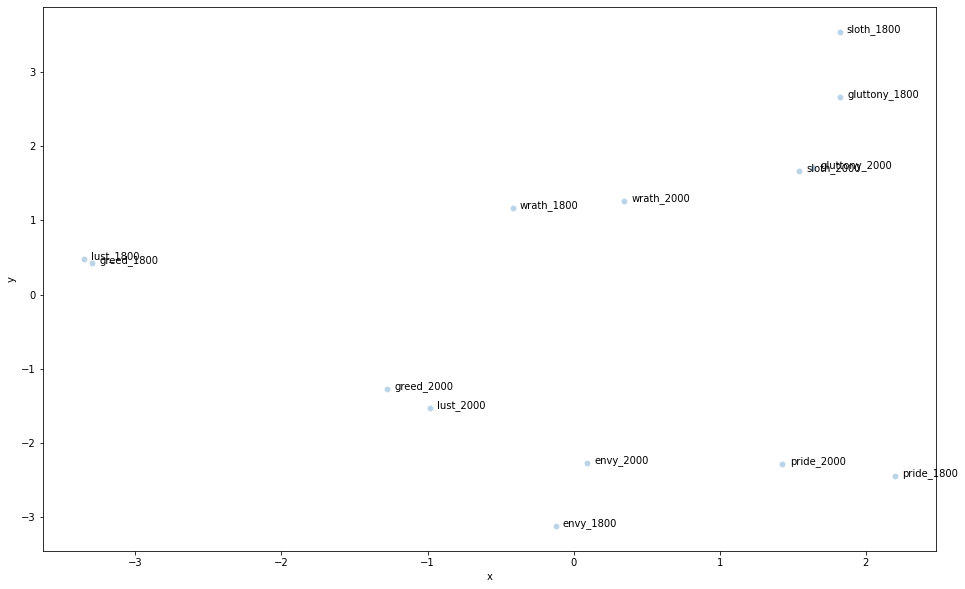

In [ ]:
# Plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",    
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

# Label plot
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']))

label_point(df_subset.x, df_subset.y, df_subset.labels, plt.gca()) 

# Saving figure
plt.savefig("tsne_cbow.pdf", transparent=True) 

Diachronic comparison for each sin

In [ ]:
lust = slice_post_lem.wv["lust"]
slice_past_lem.wv.most_similar(positive=[lust])

[('passion', 0.6909980177879333),
 ('lust', 0.6632243394851685),
 ('lustful', 0.6034518480300903),
 ('voluptuary', 0.6032487750053406),
 ('passionate', 0.603138267993927),
 ('concupiscence', 0.5918716788291931),
 ('wantonness', 0.5837652683258057),
 ('inflames', 0.582274317741394),
 ('prompting', 0.5720900893211365),
 ('loathes', 0.571982204914093)]

In [ ]:
lust = slice_past_lem.wv["lust"]
slice_post_lem.wv.most_similar(positive=[lust])

[('lust', 0.6632243394851685),
 ('greed', 0.6416778564453125),
 ('vengeance', 0.5754141211509705),
 ('avarice', 0.5511735081672668),
 ('jealousy', 0.5172246694564819),
 ('thirst', 0.5142955780029297),
 ('cruelty', 0.5129895210266113),
 ('hatred', 0.4797898530960083),
 ('vicious', 0.4780648946762085),
 ('deceit', 0.47544270753860474)]

In [ ]:
greed = slice_post_lem.wv["greed"]
slice_past_lem.wv.most_similar(positive=[greed])

[('greed', 0.6972983479499817),
 ('rapacity', 0.6963156461715698),
 ('avarice', 0.6813987493515015),
 ('inhumanity', 0.6483207941055298),
 ('selfseeking', 0.6439217329025269),
 ('lust', 0.641677975654602),
 ('disloyalty', 0.6339086890220642),
 ('malevolence', 0.6308139562606812),
 ('lawlessness', 0.6235101222991943),
 ('basest', 0.6230782866477966)]

In [ ]:
greed = slice_past_lem.wv["greed"]
slice_post_lem.wv.most_similar(positive=[greed])

[('greed', 0.6972984075546265),
 ('avarice', 0.5929434299468994),
 ('greedy', 0.5273028612136841),
 ('lust', 0.526788592338562),
 ('dishonesty', 0.5161908268928528),
 ('jealousy', 0.5128492712974548),
 ('incompetence', 0.5014585852622986),
 ('deceit', 0.4953381419181824),
 ('cruelty', 0.49467405676841736),
 ('laziness', 0.4893949031829834)]

In [ ]:
gluttony = slice_past_lem.wv["gluttony"]
slice_post_lem.wv.most_similar(positive=[gluttony])

[('binge', 0.6043122410774231),
 ('debauchery', 0.5830267667770386),
 ('promiscuity', 0.5722999572753906),
 ('overindulgence', 0.5545711517333984),
 ('vile', 0.553525447845459),
 ('booze', 0.5525224804878235),
 ('incompetence', 0.5508560538291931),
 ('greed', 0.5458822250366211),
 ('cruelty', 0.5392733812332153),
 ('boredom', 0.5364463329315186)]

In [ ]:
gluttony = slice_post_lem.wv["gluttony"]
slice_past_lem.wv.most_similar(positive=[gluttony])

[('longindulged', 0.5863755345344543),
 ('abnormity', 0.5684435367584229),
 ('selfdefeating', 0.5593699216842651),
 ('eroticism', 0.5558233857154846),
 ('bookbuying', 0.5482525825500488),
 ('monopolization', 0.5408875942230225),
 ('indifferentism', 0.540597677230835),
 ('publie', 0.5399396419525146),
 ('herhis', 0.5384774208068848),
 ('unswerved', 0.5339304208755493)]

In [ ]:
envy = slice_past_lem.wv["envy"]
slice_post_lem.wv.most_similar(positive=[envy])

[('jealousy', 0.4803890883922577),
 ('envy', 0.4743201732635498),
 ('swoon', 0.4568946063518524),
 ('lust', 0.43481600284576416),
 ('delight', 0.4311167597770691),
 ('decadent', 0.4261385500431061),
 ('tawdry', 0.4203556180000305),
 ('cunning', 0.4144135117530823),
 ('ting', 0.4007837772369385),
 ('feign', 0.399847149848938)]

In [ ]:
envy = slice_post_lem.wv["envy"]
slice_past_lem.wv.most_similar(positive=[envy])

[('idolize', 0.5371326208114624),
 ('vied', 0.5314292311668396),
 ('infatuate', 0.4809420704841614),
 ('despises', 0.4755423367023468),
 ('envy', 0.4743202328681946),
 ('uncalculating', 0.4741176664829254),
 ('outlive', 0.4726063311100006),
 ('selfengrossed', 0.47223135828971863),
 ('whose', 0.4671557545661926),
 ('waywardness', 0.4670400023460388)]

In [ ]:
sloth = slice_past_lem.wv["sloth"]
slice_post_lem.wv.most_similar(positive=[sloth])

[('greed', 0.5360592603683472),
 ('boredom', 0.533169686794281),
 ('mindless', 0.5251478552818298),
 ('filth', 0.5195623636245728),
 ('laziness', 0.5156387686729431),
 ('brutish', 0.5056948661804199),
 ('cruelty', 0.49816372990608215),
 ('mediocrity', 0.48806232213974),
 ('dishonesty', 0.4847014844417572),
 ('isolation', 0.4814155101776123)]

In [ ]:
sloth = slice_post_lem.wv["sloth"]
slice_past_lem.wv.most_similar(positive=[sloth])

[('scourg', 0.5686920285224915),
 ('duta', 0.5678945779800415),
 ('bignosed', 0.5591448545455933),
 ('likho', 0.5481458902359009),
 ('capra', 0.538565993309021),
 ('brooder', 0.5383602380752563),
 ('500pound', 0.5375986099243164),
 ('springinrock', 0.5371078252792358),
 ('metzengerstein', 0.5340527296066284),
 ('cuus', 0.5284757614135742)]

In [ ]:
wrath = slice_past_lem.wv["wrath"]
slice_post_lem.wv.most_similar(positive=[wrath])

[('fury', 0.7093749642372131),
 ('rage', 0.7014946341514587),
 ('anger', 0.6183896660804749),
 ('wrath', 0.6091572046279907),
 ('vengeance', 0.5753679275512695),
 ('indignation', 0.5377095341682434),
 ('torrent', 0.5018759965896606),
 ('hatred', 0.5009435415267944),
 ('fiery', 0.5005514621734619),
 ('1039', 0.498333603143692)]

In [ ]:
wrath = slice_post_lem.wv["wrath"]
slice_past_lem.wv.most_similar(positive=[wrath])

[('korah', 0.6602007150650024),
 ('euph', 0.6563378572463989),
 ('righteous', 0.6519209742546082),
 ('wrath', 0.6091572046279907),
 ('blaspheme', 0.6061803698539734),
 ('injur', 0.5992848873138428),
 ('proscrib', 0.5931464433670044),
 ('misguide', 0.5886418223381042),
 ('impious', 0.584628164768219),
 ('apostate', 0.5813407897949219)]

In [ ]:
pride = slice_past_lem.wv["pride"]
slice_post_lem.wv.most_similar(positive=[pride])

[('pride', 0.5890169143676758),
 ('arrogance', 0.49525466561317444),
 ('jealousy', 0.4760016202926636),
 ('stubbornness', 0.47224152088165283),
 ('lust', 0.4633569121360779),
 ('indignation', 0.46106085181236267),
 ('shame', 0.4425071179866791),
 ('assuage', 0.44129300117492676),
 ('affection', 0.43124139308929443),
 ('contempt', 0.4278505742549896)]

In [ ]:
pride = slice_post_lem.wv["pride"]
slice_past_lem.wv.most_similar(positive=[pride])

[('pride', 0.5890169143676758),
 ('loyalty', 0.5840179920196533),
 ('disinterestedness', 0.5399143695831299),
 ('patriotism', 0.5359594821929932),
 ('selfdevotion', 0.5280002355575562),
 ('magnanimity', 0.5111092329025269),
 ('nobility', 0.5052523016929626),
 ('bravery', 0.5001270771026611),
 ('distaste', 0.4981914162635803),
 ('valor', 0.4935779273509979)]

Analogies for each sin

In [ ]:
slice_past_lem.wv.most_similar(positive=["lust","proud"],negative=["insatiate"])

[('prouder', 0.6853928565979004),
 ('pride', 0.6806970834732056),
 ('proudest', 0.6498830318450928),
 ('haughty', 0.6238750219345093),
 ('noble', 0.6111562252044678),
 ('highborn', 0.6069296598434448),
 ('lowborn', 0.5966935157775879),
 ('haughtiest', 0.5825047492980957),
 ('princely', 0.5592971444129944),
 ('regal', 0.5537266135215759)]

In [ ]:
slice_post_lem.wv.most_similar(positive=["lust","smite"],negative=["yearn"])

[('wrath', 0.5857904553413391),
 ('almighty', 0.5768520832061768),
 ('sinner', 0.572155773639679),
 ('hath', 0.571799635887146),
 ('vengeance', 0.5629216432571411),
 ('satan', 0.5627626180648804),
 ('smote', 0.559866189956665),
 ('smites', 0.5376514196395874),
 ('daimon', 0.5329321622848511),
 ('whosoever', 0.5307002067565918)]

In [ ]:
slice_past_lem.wv.most_similar(positive=["greed","desire"],negative=["power"])

[('cupidity', 0.665024995803833),
 ('lust', 0.6442615985870361),
 ('avarice', 0.6377028226852417),
 ('covetousness', 0.6249949932098389),
 ('insatiable', 0.6208261847496033),
 ('inordinate', 0.6066955327987671),
 ('sordid', 0.606604814529419),
 ('selfseeking', 0.6001566648483276),
 ('greedy', 0.5964305400848389),
 ('pander', 0.5912319421768188)]

In [ ]:
slice_post_lem.wv.most_similar(positive=["greed","good"],negative=["bad"])

[('generosity', 0.7009766697883606),
 ('virtue', 0.691861629486084),
 ('boundless', 0.6518940925598145),
 ('compassion', 0.6502262353897095),
 ('devotion', 0.6438449621200562),
 ('loyalty', 0.6308599710464478),
 ('honesty', 0.6261864304542542),
 ('tenacity', 0.619398832321167),
 ('rectitude', 0.6179364323616028),
 ('intellect', 0.6087763905525208)]

In [ ]:
slice_past_lem.wv.most_similar(positive=["gluttony","wrath"],negative=["eat"])

[('malignity', 0.7060697078704834),
 ('rage', 0.6858959197998047),
 ('ire', 0.6608771681785583),
 ('anger', 0.660576581954956),
 ('causeless', 0.6579099297523499),
 ('impiety', 0.6533054113388062),
 ('indignation', 0.6532676219940186),
 ('malignant', 0.6512485146522522),
 ('vindictiveness', 0.6502541303634644),
 ('frenzy', 0.6497611999511719)]

In [ ]:
slice_post_lem.wv.most_similar(positive=["gluttony","desire"],negative=["food"])

[('unshakable', 0.62907475233078),
 ('lust', 0.6285097599029541),
 ('betrayal', 0.6226905584335327),
 ('impulsive', 0.5973862409591675),
 ('passion', 0.5897608995437622),
 ('disloyalty', 0.5869541168212891),
 ('perverse', 0.5787559747695923),
 ('allconsuming', 0.575568675994873),
 ('discouragement', 0.5754282474517822),
 ('candor', 0.5739752054214478)]

In [ ]:
slice_past_lem.wv.most_similar(positive=["envy","pride"],negative=["jealousy"])

[('proud', 0.7765955328941345),
 ('scorn', 0.6441923379898071),
 ('proudest', 0.6359854936599731),
 ('prouder', 0.6309875249862671),
 ('lowliness', 0.6187992095947266),
 ('refin', 0.5960910320281982),
 ('princely', 0.5938007235527039),
 ('lordly', 0.5897807478904724),
 ('noble', 0.5859153270721436),
 ('boast', 0.5812481641769409)]

In [ ]:
slice_post_lem.wv.most_similar(positive=["envy","good"],negative=["bad"])

[('admire', 0.6768695116043091),
 ('admiration', 0.6651813983917236),
 ('devotion', 0.6582621335983276),
 ('adore', 0.6470017433166504),
 ('generosity', 0.6413946151733398),
 ('affection', 0.6149865388870239),
 ('boundless', 0.6103733777999878),
 ('unabashed', 0.6019070148468018),
 ('charm', 0.5892833471298218),
 ('adoration', 0.5837780833244324)]

In [ ]:
slice_past_lem.wv.most_similar(positive=["sloth","eat"],negative=["sleep"])

[('gluttony', 0.6370066404342651),
 ('glutton', 0.6065834760665894),
 ('pamper', 0.5977883338928223),
 ('eats', 0.5934317708015442),
 ('scavenger', 0.5665528178215027),
 ('greediness', 0.5660552978515625),
 ('gourmand', 0.5616759061813354),
 ('laziness', 0.5586415529251099),
 ('brutalize', 0.5527361631393433),
 ('degenerate', 0.5506415367126465)]

In [ ]:
slice_post_lem.wv.most_similar(positive=["sloth","eat"],negative=["sleep"])

[('fajitas', 0.6039021015167236),
 ('mutton', 0.5871303677558899),
 ('goat', 0.5831271409988403),
 ('grassfed', 0.5745259523391724),
 ('chickenfried', 0.5664491653442383),
 ('ragout', 0.5600216388702393),
 ('terrine', 0.5526159405708313),
 ('kebab', 0.5453356504440308),
 ('filet', 0.5419667959213257),
 ('canales', 0.5406403541564941)]

In [ ]:
slice_past_lem.wv.most_similar(positive=["wrath","pride"],negative=["anger"])

[('glory', 0.6490706205368042),
 ('proud', 0.6369428634643555),
 ('ambition', 0.625749945640564),
 ('abase', 0.6057823300361633),
 ('renown', 0.5917521715164185),
 ('scorn', 0.5912395715713501),
 ('godlike', 0.5847351551055908),
 ('spurns', 0.5689800381660461),
 ('mammon', 0.5642199516296387),
 ('aspirings', 0.5551052093505859)]

In [ ]:
slice_post_lem.wv.most_similar(positive=["wrath","beast"],negative=["sin"])

[('ferocious', 0.602403998374939),
 ('vulture', 0.5801622867584229),
 ('roc', 0.5798394680023193),
 ('fierce', 0.5775371789932251),
 ('talon', 0.5771403312683105),
 ('arrow', 0.5663845539093018),
 ('ox', 0.5635613203048706),
 ('fearsome', 0.5567657947540283),
 ('claw', 0.5560245513916016),
 ('serpent', 0.5506942272186279)]

In [ ]:
slice_past_lem.wv.most_similar(positive=["pride","nation"],negative=["sin"])

[('patriotism', 0.5749344825744629),
 ('nationality', 0.5689296722412109),
 ('emulous', 0.5643227696418762),
 ('aristocracy', 0.563996434211731),
 ('prestige', 0.5631260871887207),
 ('republic', 0.5599997639656067),
 ('plutocracy', 0.5499345064163208),
 ('warlike', 0.5452343225479126),
 ('empire', 0.5429201126098633),
 ('briton', 0.5412158966064453)]

In [ ]:
slice_post_lem.wv.most_similar(positive=["pride","sport"],negative=["sin"])

[('rugby', 0.6037725210189819),
 ('athletic', 0.5997622609138489),
 ('soccer', 0.5725187063217163),
 ('tennis', 0.5595639944076538),
 ('basketball', 0.554546594619751),
 ('collegiate', 0.5523561835289001),
 ('cycling', 0.5483757257461548),
 ('football', 0.5404487252235413),
 ('baseball', 0.5356302261352539),
 ('intercollegiate', 0.5302042961120605)]

Similarities for each sin in the two considered periods

In [ ]:
for s in sins:
  print(s)
  print("Most similar in 1800-1899")
  print(slice_past_lem.wv.most_similar(s))
  print("Most similar in 2000-2010")
  print(slice_post_lem.wv.most_similar(s))
  print("------------------------------")


lust
Most similar in 1800-1899
[('greed', 0.8449305295944214), ('avarice', 0.8268189430236816), ('insatiate', 0.7841606140136719), ('covetousness', 0.7745275497436523), ('pander', 0.7468448281288147), ('rapacity', 0.725438117980957), ('unholy', 0.7187215685844421), ('glut', 0.7166198492050171), ('lustful', 0.7159963846206665), ('sordid', 0.7085992097854614)]
Most similar in 2000-2010
[('jealousy', 0.7290732860565186), ('yearn', 0.6794715523719788), ('greed', 0.670731246471405), ('desire', 0.6618666648864746), ('longing', 0.6614753007888794), ('vengeance', 0.6530430316925049), ('betrayal', 0.6527420282363892), ('primal', 0.6513813734054565), ('hatred', 0.6479294300079346), ('arouse', 0.6478952169418335)]
------------------------------
greed
Most similar in 1800-1899
[('avarice', 0.9014821648597717), ('lust', 0.8449306488037109), ('cupidity', 0.8194782137870789), ('rapacity', 0.8158572912216187), ('covetousness', 0.8113819360733032), ('selfseeking', 0.7907378077507019), ('pander', 0.7868

In [ ]:
for s1 in sins_labels:
  for s2 in sins_labels:
    w1 = s1[:-5]
    w2 = s2[:-5]
    if s1.endswith("1800") and s2.endswith("1800"):
      sim = round(1 - cosine(slice_past_lem.wv[w1],slice_past_lem.wv[w2]),3)
      print("Similarity between {} and {}:\t{}".format(s1,s2,sim))
    elif s1.endswith("1800") and s2.endswith("2000"):
      sim = round(1 - cosine(slice_past_lem.wv[w1],slice_post_lem.wv[w2]),3)
      print("Similarity between {} and {}:\t{}".format(s1,s2,sim))
    elif s1.endswith("2000") and s2.endswith("1800"):
      pass
    else:
      sim = round(1 - cosine(slice_post_lem.wv[w1],slice_post_lem.wv[w2]),3)
      print("Similarity between {} and {}:\t{}".format(s1,s2,sim))

Similarity between lust_1800 and lust_1800:	1.0
Similarity between lust_1800 and greed_1800:	0.835
Similarity between lust_1800 and gluttony_1800:	0.613
Similarity between lust_1800 and sloth_1800:	0.557
Similarity between lust_1800 and wrath_1800:	0.429
Similarity between lust_1800 and envy_1800:	0.471
Similarity between lust_1800 and pride_1800:	0.517
Similarity between lust_1800 and lust_2000:	0.621
Similarity between lust_1800 and greed_2000:	0.629
Similarity between lust_1800 and gluttony_2000:	0.235
Similarity between lust_1800 and sloth_2000:	0.266
Similarity between lust_1800 and wrath_2000:	0.413
Similarity between lust_1800 and envy_2000:	0.346
Similarity between lust_1800 and pride_2000:	0.268
Similarity between greed_1800 and lust_1800:	0.835
Similarity between greed_1800 and greed_1800:	1.0
Similarity between greed_1800 and gluttony_1800:	0.616
Similarity between greed_1800 and sloth_1800:	0.598
Similarity between greed_1800 and wrath_1800:	0.388
Similarity between greed_1

SKIPGRAM analysis

In [9]:
# Loading of the two pretrained CBOW model
slice_past_lem_skip= Word2Vec.load('models/CADE/past_lem_skip_aligned.model')
slice_post_lem_skip = Word2Vec.load('models/CADE/post_lem_skip_aligned.model')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [10]:
# Extract the Skipgram word embedding 
past_sins = slice_past_lem_skip[sins]
post_sins = slice_post_lem_skip[sins]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Word embedding concatenation
all_sins = np.concatenate((past_sins,post_sins))

In [17]:
# TSNE dimensionality reduction
t_sne = TSNE(
    n_components=2,
    learning_rate=0.0001,
    perplexity=2,
    n_iter=2000,
    init="random"
)

S_t_sne = t_sne.fit_transform(all_sins)

In [18]:
S_t_sne

array([[-1.7103878 , -2.7194586 ],
       [-1.559911  , -3.0895236 ],
       [-0.694658  ,  1.4094079 ],
       [-1.4367723 ,  1.9381943 ],
       [ 1.0895741 ,  3.2118287 ],
       [ 0.9438333 , -1.174992  ],
       [ 2.823525  , -0.30978388],
       [-1.9870912 , -1.3892431 ],
       [-1.2089974 , -3.7291188 ],
       [ 0.21614517,  1.8896748 ],
       [ 0.05807597,  1.8649409 ],
       [ 1.2660753 ,  3.582175  ],
       [ 0.92777026, -1.1726243 ],
       [ 2.9111667 , -0.30058557]], dtype=float32)

In [20]:
# Data preparation for the plot
df_subset = pd.DataFrame()
sins_1800 = [s+"_1800" for s in sins]
sins_2000 = [s+"_2000" for s in sins]
sins_labels = sins_1800 + sins_2000
df_subset["labels"] = sins_labels
df_subset['x'] = S_t_sne[:,0]
df_subset['y'] = S_t_sne[:,1]

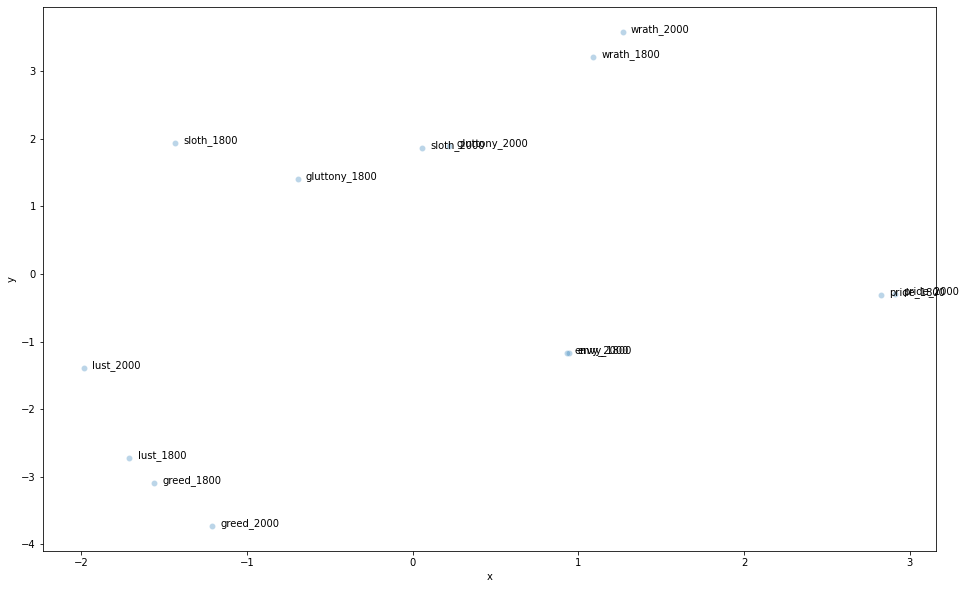

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",    
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']))

label_point(df_subset.x, df_subset.y, df_subset.labels, plt.gca()) 

# Saving figure
plt.savefig("tsne_skipgram.pdf", transparent=True) 

SKIPGRAM sins similarity

In [ ]:
for s in sins:
  print(s)
  print("Most similar in 1800-1899")
  print(slice_past_lem_skip.wv.most_similar(s))
  print("Most similar in 2000-2010")
  print(slice_post_lem_skip.wv.most_similar(s))
  print("------------------------------")


lust
Most similar in 1800-1899
[('avarice', 0.7756308913230896), ('covetousness', 0.7548677921295166), ('greed', 0.7534157633781433), ('bestial', 0.7531265616416931), ('insatiate', 0.7476930618286133), ('lustful', 0.7391573190689087), ('lechery', 0.7282031178474426), ('unholy', 0.699781060218811), ('sensual', 0.6987738609313965), ('ungodliness', 0.6927661299705505)]
Most similar in 2000-2010
[('erotic', 0.636633038520813), ('arouse', 0.6327370405197144), ('seduction', 0.6073084473609924), ('bloodlust', 0.6043492555618286), ('desire', 0.6006903052330017), ('unrequited', 0.5951858758926392), ('unquenchable', 0.5941604375839233), ('lustful', 0.5835839509963989), ('masturbatory', 0.5834107995033264), ('magickal', 0.5825469493865967)]
------------------------------
greed
Most similar in 1800-1899
[('avarice', 0.829157829284668), ('lust', 0.7534158229827881), ('rapacity', 0.7495337128639221), ('covetousness', 0.746393620967865), ('niggardliness', 0.7455429434776306), ('cupidity', 0.739604651

Diachronic comparison for each sin (SKIPGRAM)

In [ ]:
lust = slice_post_lem_skip.wv["lust"]
slice_past_lem_skip.wv.most_similar(positive=[lust])

[('lust', 0.6732374429702759),
 ('passion', 0.6233614683151245),
 ('selfworship', 0.6231303215026855),
 ('concupiscence', 0.6158053874969482),
 ('allconsuming', 0.6118080019950867),
 ('lechery', 0.5946181416511536),
 ('loathe', 0.5903812646865845),
 ('enthrals', 0.58950275182724),
 ('insnared', 0.5867559909820557),
 ('unappeased', 0.5864748954772949)]

In [ ]:
lust = slice_past_lem_skip.wv["lust"]
slice_post_lem_skip.wv.most_similar(positive=[lust])

[('lust', 0.6732373833656311),
 ('greed', 0.6686105728149414),
 ('avarice', 0.6535168886184692),
 ('idolatrous', 0.6503410339355469),
 ('unquenchable', 0.6329957246780396),
 ('abomination', 0.632872462272644),
 ('wanton', 0.6320039629936218),
 ('bloodlust', 0.630084753036499),
 ('unpardonable', 0.6137733459472656),
 ('uncleanness', 0.6114602088928223)]

In [ ]:
greed = slice_post_lem_skip.wv["greed"]
slice_past_lem_skip.wv.most_similar(positive=[greed])

[('greed', 0.6951747536659241),
 ('avarice', 0.6898093819618225),
 ('niggardliness', 0.6733849048614502),
 ('lust', 0.668610692024231),
 ('ungodliness', 0.666580080986023),
 ('avenges', 0.6627527475357056),
 ('bestiality', 0.6623342633247375),
 ('rankest', 0.6595438122749329),
 ('maliciousness', 0.6571894884109497),
 ('demagogism', 0.639201283454895)]

In [ ]:
greed = slice_past_lem_skip.wv["greed"]
slice_post_lem_skip.wv.most_similar(positive=[greed])

[('greed', 0.6951747536659241),
 ('avarice', 0.6326674222946167),
 ('rapacious', 0.6183076500892639),
 ('hunger', 0.5830899477005005),
 ('thieve', 0.5814796686172485),
 ('whet', 0.5726701617240906),
 ('hatred', 0.5678983926773071),
 ('appetite', 0.5677450895309448),
 ('monger', 0.5653621554374695),
 ('selfseeking', 0.5644330382347107)]

In [ ]:
gluttony = slice_post_lem_skip.wv["gluttony"]
slice_past_lem_skip.wv.most_similar(positive=[gluttony])

[('enthrals', 0.7723079323768616),
 ('selfannihilation', 0.7605449557304382),
 ('concupiscence', 0.757247805595398),
 ('unchastised', 0.7547425031661987),
 ('enthu', 0.7516008615493774),
 ('imbittering', 0.7494652271270752),
 ('outbreakings', 0.7467048764228821),
 ('everrenewed', 0.7454419136047363),
 ('selfexposure', 0.7449605464935303),
 ('inaugurates', 0.7414959669113159)]

In [ ]:
gluttony = slice_past_lem_skip.wv["gluttony"]
slice_post_lem_skip.wv.most_similar(positive=[gluttony])

[('overindulgence', 0.6982274055480957),
 ('promiscuity', 0.6966488361358643),
 ('debauchery', 0.6656736135482788),
 ('scrofula', 0.642753005027771),
 ('impotence', 0.6370631456375122),
 ('overindulge', 0.6358894109725952),
 ('binge', 0.6349143981933594),
 ('perfectionism', 0.6321558952331543),
 ('burgher', 0.6300604343414307),
 ('illbred', 0.6248383522033691)]

In [ ]:
envy = slice_past_lem_skip.wv["envy"]
slice_post_lem_skip.wv.most_similar(positive=[envy])

[('envy', 0.6826376914978027),
 ('conscientiousness', 0.6220343112945557),
 ('inveterate', 0.6191898584365845),
 ('covetousness', 0.6045652627944946),
 ('spunk', 0.593441367149353),
 ('inoffensiveness', 0.5890293121337891),
 ('idolize', 0.5885807275772095),
 ('adulation', 0.5838332772254944),
 ('aped', 0.5772130489349365),
 ('gunfighters', 0.57708740234375)]

In [ ]:
envy = slice_post_lem_skip.wv["envy"]
slice_past_lem_skip.wv.most_similar(positive=[envy])

[('envy', 0.6826378107070923),
 ('selfexaltation', 0.6402292847633362),
 ('dotings', 0.6364178657531738),
 ('masterpassion', 0.6336708664894104),
 ('hardheartedness', 0.624009907245636),
 ('favouritism', 0.617996096611023),
 ('selfcontrolling', 0.6129441261291504),
 ('unteachable', 0.612354576587677),
 ('selfaggrandizement', 0.6102656722068787),
 ('singleheartedness', 0.6084741353988647)]

In [ ]:
sloth = slice_past_lem_skip.wv["sloth"]
slice_post_lem_skip.wv.most_similar(positive=[sloth])

[('twotoed', 0.6526461243629456),
 ('sloth', 0.6154940128326416),
 ('douc', 0.5848346948623657),
 ('perfectionism', 0.5802801251411438),
 ('endemic', 0.5764549970626831),
 ('langur', 0.573596179485321),
 ('omnivorous', 0.571795642375946),
 ('laziness', 0.5702921152114868),
 ('predation', 0.5653505921363831),
 ('overabundance', 0.5651220083236694)]

In [ ]:
sloth = slice_post_lem_skip.wv["sloth"]
slice_past_lem_skip.wv.most_similar(positive=[sloth])

[('twofooted', 0.6637875437736511),
 ('ourang', 0.6529130935668945),
 ('unmatchable', 0.6515509486198425),
 ('cameleopard', 0.6477664709091187),
 ('diddles', 0.647098183631897),
 ('brutishly', 0.6466654539108276),
 ('glutton', 0.6411895751953125),
 ('enceladus', 0.6389581561088562),
 ('ursine', 0.6380112171173096),
 ('walleyed', 0.6365995407104492)]

In [ ]:
wrath = slice_past_lem_skip.wv["wrath"]
slice_post_lem_skip.wv.most_similar(positive=[wrath])

[('fury', 0.6980757713317871),
 ('rage', 0.6821650266647339),
 ('outrage', 0.6605404019355774),
 ('anger', 0.656516432762146),
 ('ire', 0.647609531879425),
 ('smites', 0.6364930272102356),
 ('wrath', 0.6339231133460999),
 ('indignation', 0.6194692850112915),
 ('korah', 0.6147725582122803),
 ('enmity', 0.6102826595306396)]

In [ ]:
wrath = slice_post_lem_skip.wv["wrath"]
slice_past_lem_skip.wv.most_similar(positive=[wrath])

[('wrath', 0.6339231729507446),
 ('quarequa', 0.6106815338134766),
 ('injur', 0.6083559989929199),
 ('scorneth', 0.6071946620941162),
 ('despoiler', 0.6063925623893738),
 ('perjur', 0.6027020215988159),
 ('proscrib', 0.6016440987586975),
 ('recks', 0.5961940288543701),
 ('amalek', 0.5958511233329773),
 ('oerwhelmed', 0.5955542325973511)]

In [ ]:
pride = slice_past_lem_skip.wv["pride"]
slice_post_lem_skip.wv.most_similar(positive=[pride])

[('pride', 0.7387336492538452),
 ('proud', 0.6289364099502563),
 ('coxcomb', 0.626510500907898),
 ('bashful', 0.6072859764099121),
 ('deject', 0.6064442992210388),
 ('spunk', 0.5965726375579834),
 ('hauteur', 0.5961633920669556),
 ('ashamed', 0.5956611633300781),
 ('stil', 0.5948928594589233),
 ('envy', 0.5945876836776733)]

In [ ]:
pride = slice_post_lem_skip.wv["pride"]
slice_past_lem_skip.wv.most_similar(positive=[pride])

[('pride', 0.7387336492538452),
 ('implacability', 0.5737325549125671),
 ('favouritism', 0.5731613039970398),
 ('vainglory', 0.5692950487136841),
 ('selfabnegating', 0.5631473660469055),
 ('clannishness', 0.5625621676445007),
 ('approbativeness', 0.5624657273292542),
 ('inborn', 0.5616244077682495),
 ('sharpsightedness', 0.5602840185165405),
 ('selfdependence', 0.5587950348854065)]

Analogies for each sin (SKIPGRAM)

In [ ]:
slice_past_lem_skip.wv.most_similar(positive=["lust","proud"],negative=["insatiate"])

[('pride', 0.6748405694961548),
 ('prouder', 0.6375044584274292),
 ('haughty', 0.6276086568832397),
 ('proudest', 0.6168581247329712),
 ('haughtiest', 0.6006620526313782),
 ('purehearted', 0.5939452052116394),
 ('kingliness', 0.5798097848892212),
 ('humiliates', 0.5700355172157288),
 ('noblespirited', 0.567284345626831),
 ('sweetnatured', 0.5654679536819458)]

In [ ]:
slice_post_lem_skip.wv.most_similar(positive=["lust","smite"],negative=["yearn"])

[('smote', 0.614818274974823),
 ('smites', 0.6037377715110779),
 ('whosoever', 0.5785215497016907),
 ('shalt', 0.5656894445419312),
 ('moloch', 0.5573587417602539),
 ('sisera', 0.5545809268951416),
 ('crawlin', 0.5520610809326172),
 ('mammon', 0.5489945411682129),
 ('persecutor', 0.5452984571456909),
 ('hath', 0.5310457348823547)]

In [ ]:
slice_past_lem_skip.wv.most_similar(positive=["greed","desire"],negative=["power"])

[('avarice', 0.6621640920639038),
 ('lust', 0.6395480632781982),
 ('cupidity', 0.6267787218093872),
 ('ambition', 0.6225942373275757),
 ('covetousness', 0.6191030144691467),
 ('insatiable', 0.5997962951660156),
 ('lucre', 0.5987119674682617),
 ('greedy', 0.5894485712051392),
 ('greediness', 0.5799583196640015),
 ('pander', 0.5793251991271973)]

In [ ]:
slice_post_lem_skip.wv.most_similar(positive=["greed","good"],negative=["bad"])

[('virtue', 0.6467428803443909),
 ('rectitude', 0.6161437034606934),
 ('cleverness', 0.6158986687660217),
 ('unquenchable', 0.6082777976989746),
 ('grandiosity', 0.6074210405349731),
 ('selfsacrifice', 0.5846532583236694),
 ('doer', 0.5842481255531311),
 ('selfinterest', 0.5807974934577942),
 ('boundless', 0.5780038237571716),
 ('wellspring', 0.5742651224136353)]

In [ ]:
slice_past_lem_skip.wv.most_similar(positive=["gluttony","wrath"],negative=["eat"])

[('obduracy', 0.653093159198761),
 ('rage', 0.6513328552246094),
 ('wreaks', 0.6487218737602234),
 ('ire', 0.6445605158805847),
 ('heavendaring', 0.6391499042510986),
 ('maliciousness', 0.6353813409805298),
 ('malevolence', 0.6323411464691162),
 ('malignity', 0.6286710500717163),
 ('impenitence', 0.6260899305343628),
 ('anger', 0.6212259531021118)]

In [ ]:
slice_post_lem_skip.wv.most_similar(positive=["gluttony","desire"],negative=["food"])

[('unthinking', 0.6850957870483398),
 ('masochism', 0.6746435761451721),
 ('ufe', 0.6721470355987549),
 ('yearning', 0.6708129048347473),
 ('wantonness', 0.6556794047355652),
 ('sanctification', 0.6540666818618774),
 ('misconstrue', 0.6511889696121216),
 ('sentimentalize', 0.6484428644180298),
 ('discouragement', 0.6474310159683228),
 ('playact', 0.6468522548675537)]

In [ ]:
slice_past_lem_skip.wv.most_similar(positive=["envy","pride"],negative=["jealousy"])

[('proud', 0.7898566722869873),
 ('prouder', 0.6789578199386597),
 ('proudest', 0.6400318741798401),
 ('boast', 0.6255791783332825),
 ('admire', 0.6211020946502686),
 ('vanity', 0.6184473633766174),
 ('wellwon', 0.6107378005981445),
 ('lowliness', 0.6102962493896484),
 ('princely', 0.6099466681480408),
 ('scorn', 0.6048414707183838)]

In [ ]:
slice_post_lem_skip.wv.most_similar(positive=["envy","good"],negative=["bad"])

[('admire', 0.6491549015045166),
 ('devotion', 0.644761323928833),
 ('admiration', 0.6425526142120361),
 ('adore', 0.6124166250228882),
 ('begrudge', 0.6094975471496582),
 ('boundless', 0.5957940816879272),
 ('warmhearted', 0.5924390554428101),
 ('thoughtfulness', 0.5923786759376526),
 ('love', 0.5833446979522705),
 ('gossiped', 0.5792243480682373)]

In [ ]:
slice_past_lem_skip.wv.most_similar(positive=["sloth","eat"],negative=["sleep"])

[('glutton', 0.6401010751724243),
 ('greediness', 0.6272180080413818),
 ('flesheating', 0.6158927083015442),
 ('gluttony', 0.6153672337532043),
 ('edentata', 0.5806229710578918),
 ('carnivorous', 0.5803607702255249),
 ('gourmand', 0.578057587146759),
 ('masticate', 0.5757404565811157),
 ('voracity', 0.573079526424408),
 ('innutritious', 0.5695990920066833)]

In [ ]:
slice_post_lem_skip.wv.most_similar(positive=["sloth","eat"],negative=["sleep"])

[('mollusk', 0.6117632389068604),
 ('blintz', 0.60785973072052),
 ('carnivorous', 0.6061902642250061),
 ('chickenfried', 0.6056323051452637),
 ('devours', 0.6029421091079712),
 ('hotdog', 0.5960654020309448),
 ('mutton', 0.5918474197387695),
 ('hominy', 0.5878906846046448),
 ('vineripened', 0.5857500433921814),
 ('filet', 0.5851420164108276)]

In [ ]:
slice_past_lem_skip.wv.most_similar(positive=["wrath","pride"],negative=["anger"])

[('oermastereth', 0.6641045212745667),
 ('proud', 0.6613713502883911),
 ('scorneth', 0.6492855548858643),
 ('queller', 0.631228506565094),
 ('despis', 0.6291266679763794),
 ('oersteps', 0.6273423433303833),
 ('despiteful', 0.6204224824905396),
 ('regality', 0.6170308589935303),
 ('honor', 0.6133689880371094),
 ('unquelled', 0.6072148680686951)]

In [ ]:
slice_post_lem_skip.wv.most_similar(positive=["wrath","beast"],negative=["sin"])

[('bellowing', 0.5839745998382568),
 ('intulo', 0.5760592222213745),
 ('dervish', 0.5731035470962524),
 ('nokukhanya', 0.5662829875946045),
 ('thresh', 0.5594452619552612),
 ('tshingwayo', 0.55855792760849),
 ('warrior', 0.5533234477043152),
 ('stampede', 0.5528280735015869),
 ('iklawa', 0.549026370048523),
 ('oncemen', 0.5483098030090332)]

In [ ]:
slice_past_lem_skip.wv.most_similar(positive=["pride","nation"],negative=["sin"])

[('empire', 0.5931960344314575),
 ('patriotism', 0.5780278444290161),
 ('warlike', 0.5629042387008667),
 ('republic', 0.5610271692276001),
 ('independence', 0.5465011596679688),
 ('commonwealth', 0.5428124666213989),
 ('hegemony', 0.542244553565979),
 ('nationality', 0.5420004725456238),
 ('proud', 0.5371591448783875),
 ('briton', 0.5370259284973145)]

In [ ]:
slice_post_lem_skip.wv.most_similar(positive=["pride","sport"],negative=["sin"])

[('intramural', 0.589302659034729),
 ('collegiate', 0.5733519792556763),
 ('rugby', 0.5586195588111877),
 ('bobsledding', 0.5569621920585632),
 ('baseball', 0.5523406267166138),
 ('competitive', 0.5452251434326172),
 ('athletic', 0.5381130576133728),
 ('soccer', 0.5375596284866333),
 ('tennis', 0.5359963178634644),
 ('intercollegiate', 0.5350518822669983)]